In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import scipy 
import scipy.io

OBS_DIM = 2
ACT_DIM = 1
ACT_LOW = -1
ACT_HIGH = 1

HID_DIM = 32


## Rollout Policies

In [3]:

class RandomPolicy(tf.keras.Model):
    def __init__(self, ):
        super(RandomPolicy, self).__init__()
        return
    def call(self, ):
        return tf.convert_to_tensor(np.random.uniform(low=ACT_LOW, high=ACT_HIGH, size=(ACT_DIM)))


class ImitationPolicy(tf.keras.Model):
    def __init__(self, ):
        super(ImitationPolicy, self).__init__()
        self.linear1 = tf.keras.layers.Dense(input_shape=[OBS_DIM], units=HID_DIM, 
                                             activation="relu", use_bias=True)
        self.linear2 = tf.keras.layers.Dense(units=ACT_DIM, activation="sigmoid", use_bias=True)

    def call(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        return x

    

In [7]:
model = ImitationPolicy()
x = np.random.uniform(size=(1, OBS_DIM))

t0 = time.time()
for i in range(1000):
    y = model(x) 

print(f'1000 Iterations cost: {time.time()-t0:.4f} s.')

1000 Iterations cost: 0.6516 s.


## Imitation Learning

Train Samples: 2000 Val Samples: 500


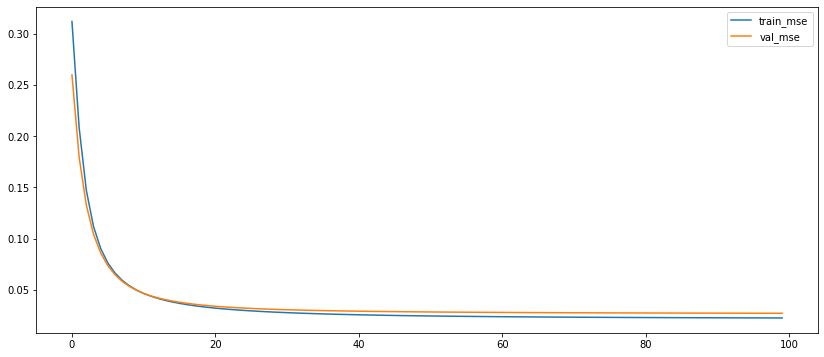

In [25]:

# 1. load data
SPLIT_RATIO = 0.2
mat = scipy.io.loadmat('data/deltaT02M100.mat')
x = mat['input_s']
y = mat['output_a']

n_val = int(SPLIT_RATIO * len(x))
x_train = x[n_val:]
y_train = y[n_val:]
x_val = x[:n_val]
y_val = y[:n_val]

print(f'Train Samples: {len(x_train)} Val Samples: {len(x_val)}')

# 2. fit data on model
model = ImitationPolicy()
model.compile(loss="mse", optimizer="sgd", metrics=["mse"])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                  epochs=100, 
                  batch_size=32, verbose=0
         )

# 3. plot learning curves
fig, axes = fig, axes = plt.subplots(1, 1, figsize=(14, 6))
axes.plot(history.history["mse"], label="train_mse")
axes.plot(history.history["val_mse"], label="val_mse")
axes.legend()